# 0.Import des modules

In [2]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()


# 1. Générer des nombres aléatoires
# 1.1 Pile ou face


In [7]:
np.random.choice(['pile', 'face'])

'face'

In [9]:
np.random.choice(['pile', 'face'], p=[0.1, 0.9])

'face'

In [19]:
max_count = 100
pile = 0
for i in range(0,max_count):
    if(np.random.choice(['pile','face']) == 'pile'):
        pile += 1
print(pile)

37


In [20]:
np.sum([np.random.choice(['Pile', 'Face']) == 'Pile' for i in range(100)])

43

In [21]:
def nb_piles(nb_tirages=100):
    return np.sum([np.random.choice(['Pile', 'Face']) == 'Pile' for i in range(nb_tirages)])

In [33]:
for i in range(5):
    print(nb_piles())

49
54
55
52
41


## 1.2 Loi uniforme (0,1)

In [6]:
np.random.uniform()

0.05704421635212309

C:\Users\rtusseau\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


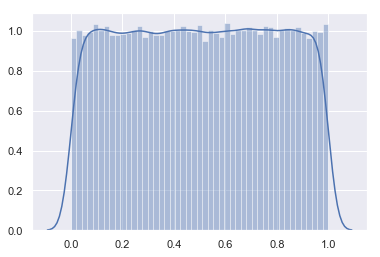

In [34]:
stats = np.random.uniform(size=100000)
sns.distplot(stats)

## 1.3 Loi exponentielle

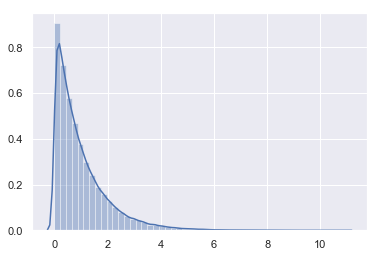

In [35]:
stats = np.random.exponential(size = 100000)
sns.distplot(stats)

In [112]:
mu = 0.95
def temps_attente(count):
    arrival_time = np.random.exponential(size = count)
    result = [mu]
    for i in range(1, count):
        if(arrival_time[i] >= mu):
            result.append(mu + max(result[i-1] - arrival_time[i], 0))
        else:
            result.append(result[i-1] + mu - arrival_time[i])
    return(result)

In [137]:
def temps_attente_rec(count, mu=1):
    temps = np.random.exponential()
    if(count == 0):
        return mu
    if(temps > mu):
        return mu + max(temps_attente_rec(count-1, mu) - temps, 0)
    else:
        return temps_attente_rec(count-1, mu) + mu - temps

In [146]:
temps_attente_rec(120,0.95)

5.900712030966647

In [147]:
temps = temps_attente(1000)

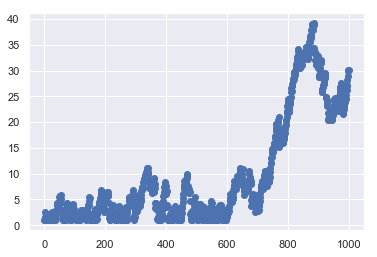

In [149]:
plt.scatter(x=range(len(temps)), y=temps)

# 2. Régression

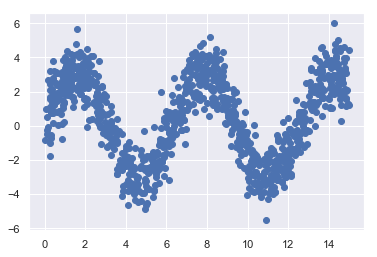

In [151]:
nb = 1000

x = np.random.uniform(low = 0.0, high = 15.0, size = nb)

y = 3.0 * np.sin(x) + np.random.normal(size = nb)

plt.scatter(x,y)

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [155]:
# Définition X et y
X = x.reshape(-1, 1) #transformer une colonne en tableau
y = y

In [156]:
# Séparation des données d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [165]:
# apprentissage
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

-0.004497862892893112


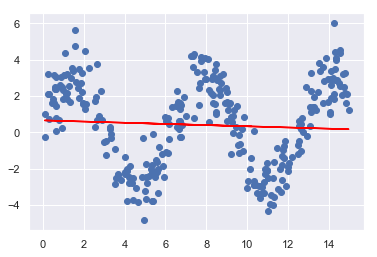

In [166]:
# prediction
y_pred = reg.predict(X_test)

print(r2_score(y_test, y_pred))

#plot


plt.scatter(X_test,y_test)
plt.plot(X_test, y_pred, color="red")

In [12]:
from sklearn.svm import SVR

reg = SVR()

reg.fit(X_train, y_train)

# prediction
y_pred = reg.predict(X_test)
print(r2_score(y_test, y_pred))
plt.scatter(X_test,y_test)
plt.scatter(X_test, y_pred, color="red")

NameError: name 'X_train' is not defined

In [11]:
from sklearn.neighbors import KNeighborsRegressor

reg = KNeighborsRegressor()

reg.fit(X_train, y_train)

# prediction
y_pred = reg.predict(X_test)
print(r2_score(y_test, y_pred))
plt.scatter(X_test,y_test)
plt.scatter(X_test, y_pred, color="red")

NameError: name 'X_train' is not defined

In [175]:
def score_func(X, y, reg, nb_splits = 10):
    scores = []
    for i in range(nb_splits):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
        reg.fit(X_train, y_train)
        y_predict = reg.predict(X_test)
        scores.append(r2_score(y_test, y_predict))
    return scores

In [183]:
scores = score_func(X,y, SVR(gamma='auto'), 20)
print(f"Score : {np.mean(scores):.2f} +/- {2 * np.std(scores):.2f}")

Score : 0.82 +/- 0.03


# 3. Données réelles

In [3]:
import pandas as pd

In [4]:
url = "https://tinyurl.com/y2fm4but"

In [5]:
df = pd.read_csv(url)

df.info()

df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
753    754          60       RL         80.0    10240   Pave   NaN      Reg   
375    376          30       RL          NaN    10020   Pave   NaN      IR1   
1252  1253          20       RL         62.0     9858   Pave   NaN      Reg   
1028  1029          50       RL         79.0     9492   Pave   NaN      Reg   
199    200          20       RL         76.0     9591   Pave   NaN      Reg   

     LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
753          Lvl    AllPub    ...            0    NaN   NaN         NaN   
375          Low    AllPub    ...            0    NaN   NaN         NaN   
1252         Lvl    AllPub    ...            0    NaN  GdWo        Shed   
1028         Lvl    AllPub    ...            0    NaN   NaN         NaN   
199          Lvl    AllPub    ...            0    NaN   NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
753        0      3   2006        WD         Normal     275500  
375        0      3   2009        WD         Normal      61000  
1252     600     11   2009        WD         Normal     130000  
1028       0      4   2007        WD         Normal     105000  
199        0      1   2009        WD         Normal     274900  

[5 rows x 81 columns]

## 3.1 Nettoyage des données
1. Plus de 20% de valeurs vides : on vire.
2. Garage et Sous-sol: Nul, on remplace par NA
3. LotFrontage : on remplace par 0

In [197]:
df[df['PoolQC'].isna() == False]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
197    198          75       RL        174.0    25419   Pave   NaN      Reg   
810    811          20       RL         78.0    10140   Pave   NaN      Reg   
1170  1171          80       RL         76.0     9880   Pave   NaN      Reg   
1182  1183          60       RL        160.0    15623   Pave   NaN      IR1   
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   
1386  1387          60       RL         80.0    16692   Pave   NaN      IR1   
1423  1424          80       RL          NaN    19690   Pave   NaN      IR1   

     LandContour Utilities    ...     PoolArea PoolQC  Fence MiscFeature  \
197          Lvl    AllPub    ...          512     Ex  GdPrv         NaN   
810          Lvl    AllPub    ...          648     Fa  GdPrv         NaN   
1170         Lvl    AllPub    ...          576     Gd  GdPrv         NaN   
1182         Lvl    AllPub    ...          555     Ex  MnPrv         NaN   
1298         Bnk    AllPub    ...          480     Gd    NaN         NaN   
1386         Lvl    AllPub    ...          519     Fa  MnPrv        TenC   
1423         Lvl    AllPub    ...          738     Gd  GdPrv         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
197        0      3   2006        WD        Abnorml     235000  
810        0      1   2006        WD         Normal     181000  
1170       0      7   2008        WD         Normal     171000  
1182       0      7   2007        WD        Abnorml     745000  
1298       0      1   2008       New        Partial     160000  
1386    2000      7   2006        WD         Normal     250000  
1423       0      8   2006        WD         Alloca     274970  

[7 rows x 81 columns]

[(0, 1), Text(0.5, 1.0, 'Pourcentage de cellules vides')]

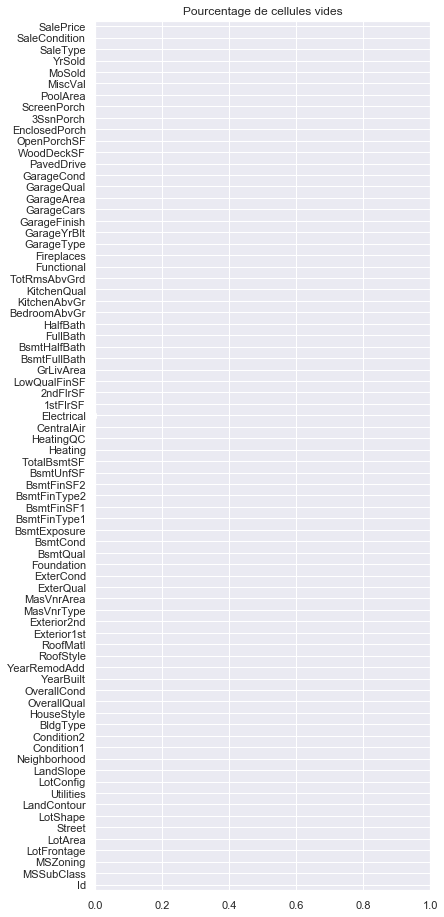

In [236]:
means = [ mean for mean in df.isnull().mean() if mean > 0]

_, ax = plt.subplots(figsize=(6,16))

df.isnull().mean().plot.barh(ax = ax)
ax.set(
    title = "Pourcentage de cellules vides",
    xlim=(0,1)
)

In [6]:
# Suppression des colonnes
#df = df.drop(['Alley', 'FireplaceQu', 'MiscFeature', 'Fence', 'PoolQC'], axis=1)
df = df.dropna(axis="columns", thresh = (80 * len(df))/100)
# Suppression des lignes où MaxVnrArea est vide
c = df['MasVnrArea'].notnull()
df = df.loc[c]
c = df['Electrical'].notnull()
df = df.loc[c]
# Remplacement des valeurs
garage_cols = [col for col in df.columns if 'Garage' in col or 'Bsmt' in col]
df.loc[:, garage_cols] = df.loc[:, garage_cols].fillna('NA')

df.loc[:, ['LotFrontage']] = df.loc[:, ['LotFrontage']].fillna(0)




df

In [240]:
#Vérification du nombre d'échantillons
df.isnull().sum().sum()

0

In [242]:
Y = df['SalePrice']

In [243]:
df[['SalePrice']].describe()

SalePrice
count    1451.000000
mean   180624.101999
std     79312.128273
min     34900.000000
25%    129900.000000
50%    162500.000000
75%    214000.000000
max    755000.000000

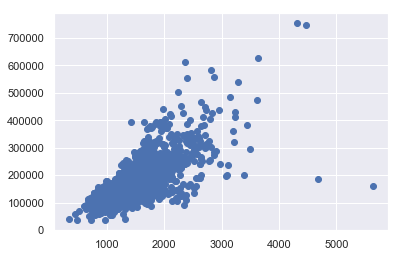

In [245]:
plt.scatter(df['GrLivArea'], df['SalePrice'])

In [7]:
c =(df['GrLivArea'] > 4000) & (df['SalePrice'] < 200000)

In [253]:
df = df.loc[~c]

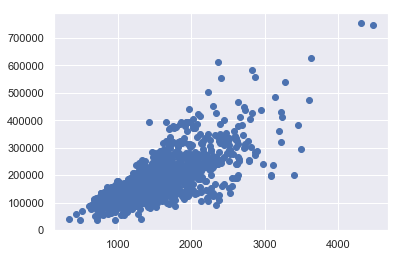

In [254]:
plt.scatter(df['GrLivArea'], df['SalePrice'])

### Affichage régression linéaire

In [290]:
X = df[['GrLivArea']]

In [271]:
y = df['SalePrice']

In [273]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
from sklearn.metrics import mean_squared_log_error

# prediction
y_pred = linear_reg.predict(X_test)

print("RMSLE-score", np.sqrt(mean_squared_log_error(y_test, y_pred)))

#plot


plt.scatter(X_test,y_test)
plt.plot(X_test, y_pred, color="red")

NameError: name 'linear_reg' is not defined

In [62]:
def score_func_squared(X, y, reg, nb_splits = 10):
    scores = []
    for i in range(nb_splits):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
        reg.fit(X_train, y_train)
        y_predict = reg.predict(X_test)
        y_predict = np.maximum(y_predict, 0)
        scores.append(np.sqrt(mean_squared_log_error(y_test, y_predict)))
    return scores

In [318]:
score_func_squared(X,y, linear_reg)

[0.21748005828927666,
 0.22533611148395555,
 0.5407147341970268,
 0.25426290078648417,
 0.18644168946452705,
 0.18683617866807276,
 0.19972178093760626,
 0.552792163592931,
 0.19007465654306419,
 0.5481540843150284]

### Modification du X

In [19]:
X = df.select_dtypes(include=['int64', 'float64']).drop(columns=['SalePrice'])

In [20]:
y = df['SalePrice']

In [304]:
score_func_squared(X, y, LinearRegression(), nb_splits=3)

[0.221181558110885, 0.21125018252424974, 0.16356651053013024]

In [22]:
import time

In [17]:
def score_stats(X, y, reg, nb_splits = 10):
    t1 = time.time()
    scores = score_func_squared(X, y, reg, nb_splits)
    duration = (time.time() - t1) / nb_splits
    print(f"{np.mean(scores):.4f} +/- {2 * np.std(scores):.4f} ({duration:.4f} s)")

In [326]:
score_stats(X, y, SVR(gamma='auto'), nb_splits=10)

0.40 +/- 0.04


In [15]:
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, ExtraTreesRegressor

In [330]:
for name, reg in [
    ('linear', LinearRegression()),
    ('svm', SVR(gamma='auto')),
    ('KNN', KNeighborsRegressor()),
    ('ada', AdaBoostRegressor()),
    ('extra', ExtraTreesRegressor(n_estimators=100)),
    ('rf', RandomForestRegressor(n_estimators=100))
]:
    print(name)
    score_stats(X,y,reg,nb_splits=10)

linear
0.32 +/- 0.43
svm
0.40 +/- 0.02
KNN
0.23 +/- 0.03
ada
0.19 +/- 0.02
extra
0.14 +/- 0.02
rf
0.14 +/- 0.02


## 3.4 Pipelines
### 3.4.2 Mise à l'échelle

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, QuantileTransformer

In [25]:
for name, reg in [
    ('linear', LinearRegression()),
    ('svm', SVR(gamma='auto')),
    ('KNN', KNeighborsRegressor()),
    ('ada', AdaBoostRegressor()),
    ('extra', ExtraTreesRegressor(n_estimators=100)),
    ('rf', RandomForestRegressor(n_estimators=100))
]:
    print(name)
    pipe = Pipeline(steps = [
        ('scaler', QuantileTransformer()),
        ('reg', reg)
    ])
    score_stats(X,y,pipe,nb_splits=10)

linear
0.2107 +/- 0.0279 (0.1558 s)
svm
0.3932 +/- 0.0281 (0.2218 s)
KNN
0.1830 +/- 0.0153 (0.1447 s)
ada
0.2027 +/- 0.0153 (0.2938 s)
extra
0.1460 +/- 0.0235 (0.9634 s)
rf
0.1494 +/- 0.0174 (1.1661 s)


In [13]:
import warnings

warnings.filterwarnings("ignore")

### 3.4.2 Encodage des catégories

In [32]:
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer

In [44]:
categories = np.array(['H', 'H', 'F', 'H', 'NB']).reshape(-1,1)

pre = OneHotEncoder(sparse=False)
#pre = LabelBinarizer()

pre.fit_transform(categories)

array([[0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [45]:
from sklearn.compose import ColumnTransformer
# Pour appliquer une transformation qu'a un type de colonne

In [68]:
# Noms des colonnes qui contiennent des chaines de caractères
str_cols = [x for x in df.select_dtypes(exclude=['int64', 'float64']).columns]
for col in str_cols:
    df[col] = df[col].astype(str)
X = df.drop(columns = ['SalePrice'])
y = df['SalePrice']
# encodage des colonnes catégorielles

enc = ColumnTransformer(transformers = [
    ('enc', OneHotEncoder(categories=[X[col].unique() for col in str_cols]), str_cols)]
    , remainder="passthrough"
)


# Pipeline
pipe = Pipeline(steps = [
    ('enc', enc),
    ('scaler', StandardScaler(with_mean=False)),
    ('reg', ExtraTreesRegressor(n_estimators=100))
])

score_stats(X, y, pipe)

0.1487 +/- 0.0235 (11.8437 s)


In [155]:
def score_stats_by_column(columns, df,reg):
    y = df['SalePrice']
    X = df.loc[:, columns]
    str_cols = [x for x in X.select_dtypes(exclude=['int64', 'float64']).columns if x in columns]
    
    for col in str_cols:
        X[col] = X[col].astype(str)
    enc = ColumnTransformer(transformers = [
        ('enc', OneHotEncoder(categories=[X[col].unique() for col in str_cols]), str_cols)]
        , remainder="passthrough"
    )


    # Pipeline
    pipe = Pipeline(steps = [
        ('enc', enc),
        ('scaler', StandardScaler(with_mean=False)),
        ('reg', reg)
    ])
    return score_func_squared(X,y, pipe)

In [73]:
for col in df.columns:
    print(col)
    score_stats_by_column([col], df, y, DecisionTreeRegressor())

Id
0.5021 +/- 0.0364 (0.1614 s)
MSSubClass
0.3320 +/- 0.0231 (0.0669 s)
MSZoning
0.3694 +/- 0.0177 (0.0736 s)
LotFrontage
0.3735 +/- 0.0331 (0.0836 s)
LotArea
0.4120 +/- 0.0200 (0.1464 s)
Street
0.4061 +/- 0.0280 (0.1121 s)
LotShape
0.3902 +/- 0.0219 (0.0753 s)
LandContour
0.4074 +/- 0.0238 (0.0735 s)
Utilities
0.4078 +/- 0.0190 (0.0609 s)
LotConfig
0.4072 +/- 0.0209 (0.0772 s)
LandSlope
0.4125 +/- 0.0222 (0.0623 s)
Neighborhood
0.2702 +/- 0.0199 (0.1311 s)
Condition1
0.3989 +/- 0.0204 (0.0808 s)
Condition2
0.4096 +/- 0.0261 (0.0812 s)
BldgType
0.4073 +/- 0.0196 (0.0695 s)
HouseStyle
0.3836 +/- 0.0298 (0.0754 s)
OverallQual
0.2342 +/- 0.0109 (0.0675 s)
OverallCond
0.3827 +/- 0.0230 (0.0670 s)
YearBuilt
0.3210 +/- 0.0132 (0.0833 s)
YearRemodAdd
0.3331 +/- 0.0211 (0.0767 s)
RoofStyle
0.3994 +/- 0.0220 (0.0766 s)
RoofMatl
0.4127 +/- 0.0244 (0.0849 s)
Exterior1st
0.3766 +/- 0.0244 (0.0974 s)
Exterior2nd
0.3768 +/- 0.0174 (0.0993 s)
MasVnrType
0.3680 +/- 0.0184 (0.0696 s)
MasVnrArea
0.4037 

In [70]:
from sklearn.tree import DecisionTreeRegressor

In [138]:
def select_columns(df, reg, count, nb_splits=10):
    y = df['SalePrice']
    X = df.drop(columns=['SalePrice'])
    best_cols = []
    for i in range(count):
        scores = []
        X = df.drop(columns=['SalePrice'])
        temp_columns = [col for col in X.columns if col not in best_cols]
        for col in temp_columns:
            columns = [col] + best_cols
            print(columns)
            X_temp = df.loc[:, columns]
            str_cols = [x for x in df.select_dtypes(exclude=['int64', 'float64']).columns if x in columns]
            
            for col in str_cols:
                X_temp[col] = X_temp[col].astype(str)

                
            encoder = ColumnTransformer(transformers = [
                ('enc', OneHotEncoder(categories=[X_temp[col].unique() for col in str_cols]), str_cols)]
                , remainder="passthrough"
            )
            # Pipeline
            pipe = Pipeline(steps = [
                ('enc', encoder),
                ('scaler', StandardScaler(with_mean=False)),
                ('reg', ExtraTreesRegressor(n_estimators=100))
            ])
            
            col_scores = score_func_squared(X_temp, y, pipe, nb_splits)
            scores.append((col, np.mean(col_scores)))
            
        max_col = ('None',100000)
        print(scores)
        for score in scores:
            if(score[1] < max_col[1]):
                max_col = score
        best_cols.append(max_col[0])
    return best_cols

In [137]:
best_3 = select_columns(df, DecisionTreeRegressor(), 3)

[('Id', 0.5057840308474898), ('MSSubClass', 0.33210573958149053), ('MSZoning', 0.37085002853274884), ('LotFrontage', 0.37481805677483226), ('LotArea', 0.4184016072114877), ('Street', 0.40953353583740554), ('LotShape', 0.3887395664692479), ('LandContour', 0.39833183565520847), ('Utilities', 0.4088090782838125), ('LotConfig', 0.4067290060878913), ('LandSlope', 0.41478495429354884), ('Neighborhood', 0.27376232062962197), ('Condition1', 0.39931179143608636), ('Condition2', 0.4079278032796152), ('BldgType', 0.4001592564237189), ('HouseStyle', 0.3861469037409369), ('OverallQual', 0.23521202389763646), ('OverallCond', 0.3738506499863812), ('YearBuilt', 0.31713455702426885), ('YearRemodAdd', 0.34239412904324407), ('RoofStyle', 0.4059260965683995), ('RoofMatl', 0.40698567714250034), ('Exterior1st', 0.3720501225362659), ('Exterior2nd', 0.3820135096767491), ('MasVnrType', 0.3720131831303974), ('MasVnrArea', 0.4134336708444885), ('ExterQual', 0.2994688277150891), ('ExterCond', 0.4055700692869002),

In [133]:
best_3 = select_columns(df, DecisionTreeRegressor(), 3)

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', '

In [134]:
best_3

['OverallQual', 'Neighborhood', 'Neighborhood']

In [182]:
best_score = 1.0
cols = ['OverallQual', 'Neighborhood']
for col in df.columns:
    if (col == 'SalePrice') or (col in cols):
        continue
    scores = score_stats_by_column(['OverallQual', col], df, DecisionTreeRegressor())
    if(np.mean(scores) < best_score):
        print(f"Best score: {np.mean(scores):.3f} +/- {2 * np.std(scores):.3f} (column {col})")
        best_score = np.mean(scores)

Best score: 0.328 +/- 0.020 (column Id)
Best score: 0.222 +/- 0.024 (column MSSubClass)
Best score: 0.222 +/- 0.025 (column BsmtQual)
Best score: 0.220 +/- 0.020 (column FullBath)
Best score: 0.218 +/- 0.019 (column Fireplaces)
Best score: 0.217 +/- 0.015 (column GarageType)


In [190]:
def select_columns(df, reg, count, nb_splits=10):
    best_cols = []
    X = df.drop(columns=['SalePrice'])
    result = []
    for i in range(count):
        scores = []
        temp_columns = [col for col in X.columns if col not in best_cols]
        for col in temp_columns:
            columns = [col] + best_cols
            col_scores = score_stats_by_column(columns, df, reg)
            scores.append((col, np.mean(col_scores)))
            
        max_col = ('None',100000)
        for score in scores:
            if(score[1] < max_col[1]):
                max_col = score
        best_cols.append(max_col[0])
        result.append(max_col)
        print(best_cols)
    return result

In [191]:
best_3 = select_columns(df, ExtraTreesRegressor(n_estimators=100), 10)

['OverallQual']
['OverallQual', 'Neighborhood']
['OverallQual', 'Neighborhood', 'GarageCars']
['OverallQual', 'Neighborhood', 'GarageCars', 'GrLivArea']
['OverallQual', 'Neighborhood', 'GarageCars', 'GrLivArea', 'TotalBsmtSF']
['OverallQual', 'Neighborhood', 'GarageCars', 'GrLivArea', 'TotalBsmtSF', 'BsmtFinSF1']
['OverallQual', 'Neighborhood', 'GarageCars', 'GrLivArea', 'TotalBsmtSF', 'BsmtFinSF1', 'HeatingQC']
['OverallQual', 'Neighborhood', 'GarageCars', 'GrLivArea', 'TotalBsmtSF', 'BsmtFinSF1', 'HeatingQC', 'LotArea']
['OverallQual', 'Neighborhood', 'GarageCars', 'GrLivArea', 'TotalBsmtSF', 'BsmtFinSF1', 'HeatingQC', 'LotArea', 'YearBuilt']
['OverallQual', 'Neighborhood', 'GarageCars', 'GrLivArea', 'TotalBsmtSF', 'BsmtFinSF1', 'HeatingQC', 'LotArea', 'YearBuilt', 'HouseStyle']


In [192]:
best_3

[('OverallQual', 0.23513453079053387),
 ('Neighborhood', 0.20531467358001101),
 ('GarageCars', 0.19857654390322604),
 ('GrLivArea', 0.18050459509836236),
 ('TotalBsmtSF', 0.16638601894114444),
 ('BsmtFinSF1', 0.15157711933842957),
 ('HeatingQC', 0.1472772227422814),
 ('LotArea', 0.14636948982773493),
 ('YearBuilt', 0.1420973438704693),
 ('HouseStyle', 0.14077776381745538)]